In [2]:
#                                                              Load Dataset

In [2]:
import pandas as pd
import numpy as np

file =  r"D:\EXCELR\A12.xlsx"
data=pd.read_excel(file, sheet_name = "glass")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
#                                                     1. Exploratory Data Analysis (EDA):

In [3]:
print('Data with zero (0) values :\n',(data==0).sum())
print('Data with null values :\n',data.isnull().sum())

Data with zero (0) values :
 RI        0
Na        0
Mg       42
Al        0
Si        0
K        30
Ca        0
Ba      176
Fe      144
Type      0
dtype: int64
Data with null values :
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [6]:
#                                                      2: Data Visualization:

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

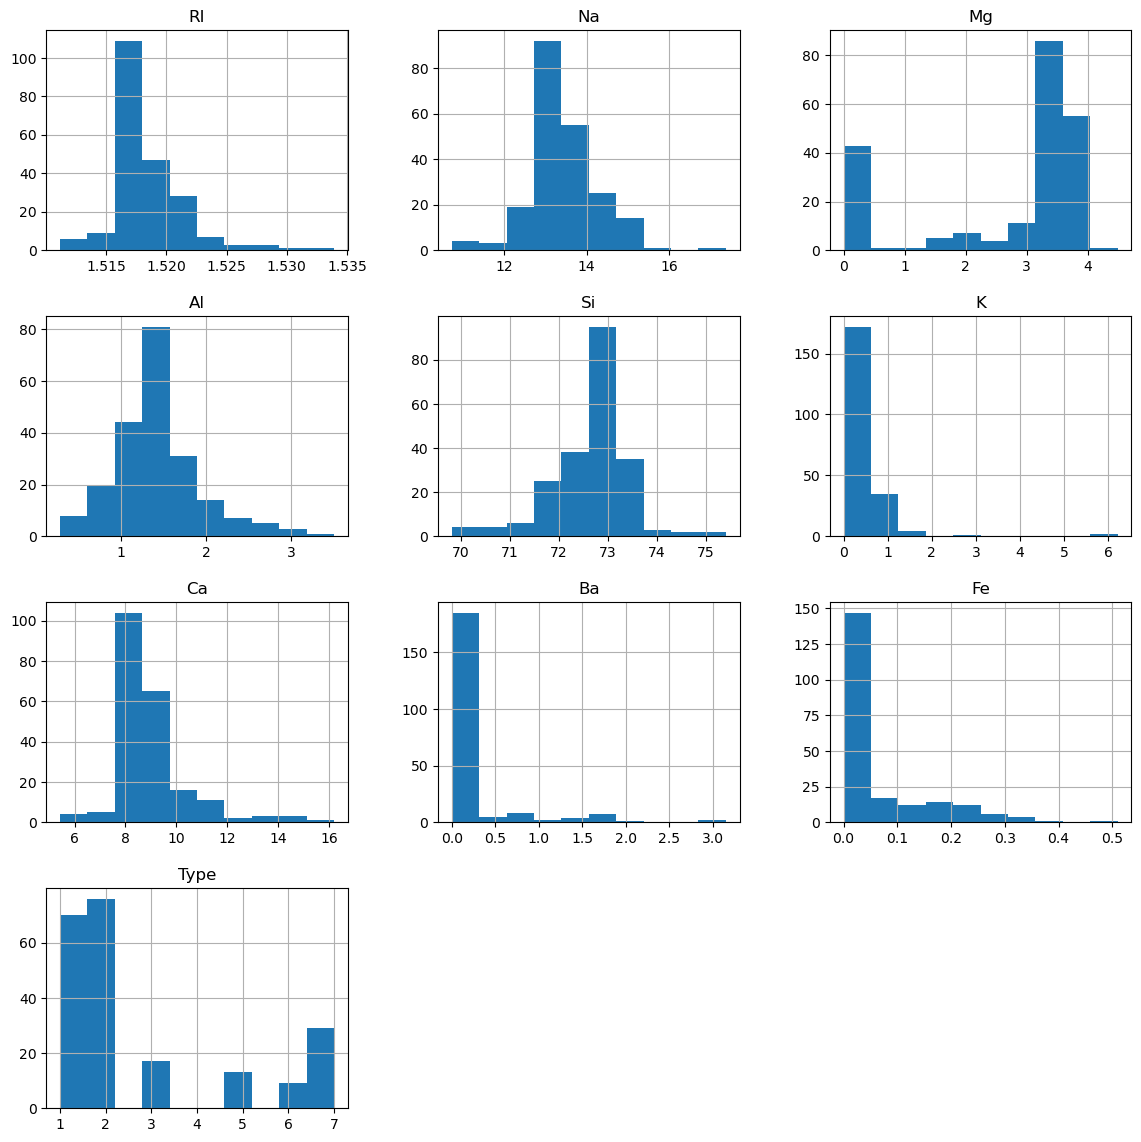

In [7]:
data.hist(figsize=(14,14))

In [4]:
data.corr()['Type'].abs().sort_values(ascending=False)

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

In [9]:
#                                                         3: Data Preprocessing

In [10]:
# 1. Check for missing values in the dataset and decide on a strategy for handling them.
# Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

'''
The values which are zero's (0) represent the absence of certain chemical component.......
which means they are not errors/inconsistencies/outliers/missing values............
so they can be left as it is
'''

"\nThe values which are zero's (0) represent the absence of certain chemical component.......\nwhich means they are not errors/inconsistencies/outliers/missing values............\nso they can be left as it is\n"

In [5]:
x=data.drop(columns='Type')
y=data['Type']

In [6]:
# 2. If there are categorical variables, apply encoding techniques like one-hot encoding
# to convert them into numerical format.

'''
Encoding techniques can't be applied to Target(Type) even if its categorical data....
we apply encoding techniques to only X CATEGORICAL FEATURES/VARIABLES
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc= le.fit_transform(y)

In [7]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
# 3. Apply feature scaling techniques such as standardization or normalization to ensure 
# that all features are on a similar scale. Handling the imbalance data.
'''
For tree-based models like :
Random Forest, Decision Tree, XGBoost, LightGBM
NO SCALING NEEDED
  BUT
we can apply standardization to avoid any feature from dominating
'''

'\nFor tree-based models like :\nRandom Forest, Decision Tree, XGBoost, LightGBM\nNO SCALING NEEDED\n  BUT\nwe can apply standardization to avoid any feature from dominating\n'

In [8]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
x_scaled = ss.fit_transform(x)
data[x.columns] = x_scaled

print("======================After Standard Scaler ======================")
data.head()

======================After Standard Scaler ======================


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


In [9]:
#                                                        4: Random Forest Model Implementation

In [10]:
# 1. Divide the data into train and test split.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x , y_enc ,test_size=0.2 ,random_state =100)

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'   # handles class imbalance
)

# Train the model
rf.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
# 3. Train the model on the train dataset. Evaluate the performance on 
# test data using metrics like accuracy, precision, recall, and F1-score.


In [12]:

from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score,classification_report 

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

print('=========================Train Data============================')
print('Accuracy : ',np.round(accuracy_score(y_train,y_pred_train) , 2 ))
print('Precision : ',np.round(precision_score(y_train,y_pred_train,average='macro') , 2 ))
print('Recall : ',np.round(recall_score(y_train,y_pred_train,average='macro') , 2 ))
print('F1-score : ',np.round(f1_score(y_train,y_pred_train,average='macro') , 2 ))

print('=========================Test Data============================')
print('Accuracy : ',np.round(accuracy_score(y_test,y_pred_test) , 2 ))
print('Precision : ',np.round(precision_score(y_test,y_pred_test,average='macro') , 2 ))
print('Recall : ',np.round(recall_score(y_test,y_pred_test,average='macro') , 2 ))
print('F1-score : ',np.round(f1_score(y_test,y_pred_test,average='macro') , 2 ))

print("\n Trianing classification report:\n", classification_report(y_train,y_pred_train))
print("\n Test classification report:\n", classification_report(y_test,y_pred_test))

=========================Train Data============================
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-score :  1.0
=========================Test Data============================
Accuracy :  0.86
Precision :  0.91
Recall :  0.83
F1-score :  0.84

 Trianing classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        24

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


 Test classification report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.94  

In [20]:
#                                                      5: Bagging and Boosting Methods

In [13]:
#           Bagging Method

from sklearn.ensemble import BaggingClassifier

# Bagging Classifier
bagging_model = BaggingClassifier(n_estimators=100,random_state=100,
                                  max_samples=0.6,max_features=0.7)
bagging_model.fit(x_train, y_train)

y_pred_train_bagging = bagging_model.predict(x_train)
y_pred_test_bagging = bagging_model.predict(x_test)

training_accuracy_bagging = accuracy_score(y_train, y_pred_train_bagging)
test_accuracy_bagging = accuracy_score(y_test, y_pred_test_bagging)

print("Bagging - Training Accuracy:", np.round(training_accuracy_bagging,2))
print("Bagging - Test Accuracy:", np.round(test_accuracy_bagging,2))
print("\n Bagging Trianing classification report:\n", classification_report(y_train,y_pred_train_bagging))
print("\n Bagging Test classification report:\n", classification_report(y_test,y_pred_test_bagging))

Bagging - Training Accuracy: 0.98
Bagging - Test Accuracy: 0.79

 Bagging Trianing classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.98      0.99        57
           2       1.00      0.79      0.88        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        24

    accuracy                           0.98       171
   macro avg       0.99      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171


 Bagging Test classification report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.93      0.74      0.82        19
           2       0.00      0.00      0.00         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1

In [23]:
#      Gradient Boost Method

from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Classifier
from sklearn.svm import LinearSVC
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
gb_model.fit(x_train, y_train)

y_pred_train_rf = gb_model.predict(x_train)
y_pred_test_rf = gb_model.predict(x_test)

training_accuracy_gb = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_gb = accuracy_score(y_test, y_pred_test_rf)

print("Gradient Boosting - Training Accuracy:", np.round(training_accuracy_gb,2))
print("Gradient Boosting - Test Accuracy:", np.round(test_accuracy_gb,2))
print("\n Gradient Boosting  classification report:\n", classification_report(y_train,y_pred_train_rf))
print("\n Gradient Boosting classification report:\n", classification_report(y_test,y_pred_test_rf))

Gradient Boosting - Training Accuracy: 1.0
Gradient Boosting - Test Accuracy: 0.79

 Gradient Boosting  classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        24

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


 Gradient Boosting classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.83      0.79      0.81        19
           2       0.33      0.33      0.33         3
           3       1.00      0.60      0.75         5
           4  

In [14]:
#     Ada Boost Method

from sklearn.ensemble import AdaBoostClassifier

# Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
ab_model = AdaBoostClassifier(n_estimators=200, learning_rate=10,estimator=DT)

ab_model.fit(x_train, y_train)

y_pred_train_ab = ab_model.predict(x_train)
y_pred_test_ab = ab_model.predict(x_test)

training_accuracy_ab = accuracy_score(y_train, y_pred_train_ab)
test_accuracy_ab = accuracy_score(y_test, y_pred_test_ab)

print("Adaptive Boosting - Training Accuracy:", np.round(training_accuracy_ab,2))
print("Adaptive Boosting - Test Accuracy:", np.round(test_accuracy_ab,2))
print("\n Adaptive Boosting  classification report:\n", classification_report(y_train,y_pred_train_ab))
print("\n Adaptive Boosting classification report:\n", classification_report(y_test,y_pred_test_ab))


Adaptive Boosting - Training Accuracy: 1.0
Adaptive Boosting - Test Accuracy: 0.74

 Adaptive Boosting  classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        24

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


 Adaptive Boosting classification report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.83      0.79      0.81        19
           2       0.33      0.33      0.33         3
           3       1.00      0.60      0.75         5
           4  

In [24]:
#pip install xgboost

In [15]:
#       XGBoost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=300,learning_rate=0.1,gamma=10,reg_lambda=4)

xgb_model.fit(x_train, y_train)

y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

training_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

print("xgb classifier - Training Accuracy:", np.round(training_accuracy_xgb,2))
print("xgb classifier - Test Accuracy:", np.round(test_accuracy_xgb,2))
print("\n xgb classification report:\n", classification_report(y_train,y_pred_train_xgb))
print("\n xgb classification report:\n", classification_report(y_test,y_pred_test_xgb))


xgb classifier - Training Accuracy: 0.63
xgb classifier - Test Accuracy: 0.56

 xgb classification report:
               precision    recall  f1-score   support

           0       0.58      0.90      0.71        60
           1       0.60      0.58      0.59        57
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8
           5       0.91      0.88      0.89        24

    accuracy                           0.63       171
   macro avg       0.35      0.39      0.36       171
weighted avg       0.53      0.63      0.57       171


 xgb classification report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.65        10
           1       0.59      0.53      0.56        19
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00     

C:\Users\bunny\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bunny\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bunny\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bunny\anaconda3\Lib\site-packag

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200,300],
    'gamma': [10,20,30],
    'reg_lambda': [1,3,5,10],
    'learning_rate': [0.1, 1, 3,5]
}

from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_test_best = best_rf_model.predict(x_test)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)

Best hyperparameters: {'gamma': 10, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_lambda': 1}
Best score: 0.6026890756302521
Test accuracy of best model: 0.5813953488372093


In [27]:
# pip install lightgbm

In [27]:
#      LightGBM

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.1, random_state=100,verbose=-1)

lgb_model.fit(x_train, y_train)

Y_pred_train = lgb_model.predict(x_train)
Y_pred_test = lgb_model.predict(x_test)

training_accuracy  = accuracy_score(y_train,Y_pred_train)
test_accuracy  = accuracy_score(y_test,Y_pred_test)

import numpy as np
print("LightGBM: training accuracy:", np.round(training_accuracy,2))
print("LightGBM: test accuracy:", np.round(test_accuracy,2))

print("\n LightGBM classification report:\n", classification_report(y_train,Y_pred_train))
print("\n LightGBM classification report:\n", classification_report(y_test,Y_pred_test))

LightGBM: training accuracy: 1.0
LightGBM: test accuracy: 0.84

 LightGBM classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        24

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


 LightGBM classification report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.85      0.89      0.87        19
           2       0.33      0.33      0.33         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         1

In [ ]:
#                           Interview questions

In [ ]:
"""
1. Explain Bagging and Boosting Methods. How are they different?
    #Bagging (Bootstrap Aggregating)
        Bagging is an ensemble technique where multiple models are trained independently in parallel using different random subsets of the data (bootstrapped samples).
        The final prediction is made by averaging (regression) or majority voting (classification).
        It mainly helps in reducing variance and preventing overfitting.
    #Boosting
        Boosting trains models sequentially, where each new model focuses on correcting the mistakes of the previous one.
        All models work together to build a strong predictor from weak learners.
        Boosting mainly helps in reducing bias and improving model accuracy.

    
         Bagging                                             Boosting                                                        
     --------------------------------------------------  --------------------------------------------------------------- 
     Models are trained **independently & in parallel    Models are trained **sequentially & depend on previous models** 
     Reduces **variance**                                Reduces **bias**                                                
     More stable, less sensitive to noise                More sensitive to outliers & noise                              
     Good for overfitting datasets                       Good for underfitting datasets                                  
     Example: Random Forest                              Example: XGBoost                                                


2. Explain how to handle imbalance in the data.
We handle imbalance using oversampling (like SMOTE), undersampling, class weights, and better metrics like F1-score and recall.
Algorithms like Random Forest and XGBoost also support imbalance handling

"""